# Carbon Metric Final Results


INPUTS
- CSV file metric tonnes of carbon per year, per land use, with 95% confidence intervals from "5. carbon calculation" GEE script

OUTPUTS
- bar chart of plant carbon in metric tonnes for each land use and each year, with 95% confidence intervals
- line chart of yearly plant carbon in metric tonnes for all farms in deal, with 95% confidence intervals
- difference between study end and start year for each land uses, in plant carbon and CO2 equivalent
- Average amount of carbon captured in each land use, reported in carbon reductions/year
- percent change between years for each land use

## Imports

Before running, download all necessary modules.

In [1]:
# modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.pyplot import Line2D
from matplotlib.patches import Patch, Rectangle
import itertools
# mpl.rcParams['font.family'] = 'Liberation Sans'

In [2]:
# global graph parameters

plt.rc('axes', axisbelow=True, titlelocation='left')
plt.rc('xtick', bottom=False)
plt.rc('ytick', left=False)
plt.rc('grid', color='lightgrey', linewidth=1)
plt.rc('legend', frameon=False)
plt.rc('savefig', dpi=300, bbox="tight", transparent=True)
plt.rc('figure', dpi=300)
plt.rc('font', family='Arial')
plt.rc('text', usetex=False)

## Set Script Parameters

Change according to the deal.

In [3]:
dealName =  'INOCAS'
reportYear = 2023
studyStartYear = 2018
studyEndYear = 2022
timePeriods = studyEndYear - studyStartYear + 1
image_format = 'png' #format for exporting plots

#change to where you want to store the final charts
#file_path_lineChart = '../Horta/2023/carbon/'+dealName+str(reportYear)+'_yearlyCarbon_'+str(studyStartYear)+'-'+str(studyEndYear)+'_LandTrendR_lineGraph.png'
#file_path_barGraph = '../Horta/2023/carbon/'+dealName+str(reportYear)+'_yearlyCarbon_'+str(studyStartYear)+'-'+str(studyEndYear)+'_LandTrendR_barChart.png'
file_path_lineChart = 'C:/Users/jperez/Downloads/python_Terrabio/FinalGraphs/lineChart_INOCAS_pd_final_20240127.png'
file_path_barGraph2 = 'C:/Users/jperez/Downloads/python_Terrabio/FinalGraphs/barGraph_INOCAS_pd_final_20240127_by_ha.png'
file_path_barGraph = 'C:/Users/jperez/Downloads/python_Terrabio/FinalGraphs/barGraph_INOCAS_pd_final_20240127.png'

## Read in the data

Place the data file in the same folder as this script.

In [4]:
#data = pd.read_csv('../Horta/2023/carbon/'+dealName+str(reportYear)+'_yearlyCarbon_'+str(studyStartYear)+'-'+str(studyEndYear)+'_20231019.csv')
#data = pd.read_csv('../Horta/2023/carbon/yearlyCarbon_'+str(studyStartYear)+'-'+str(studyEndYear)+'_20231018_original.csv')
data = pd.read_csv('C:/Users/jperez/Downloads/python_Terrabio/inocas2023_yearlyCarbon_2018-2022_20240127.CSV')
data

,carbonSum,carbonSum_lowCI,carbonSum_highCI,year,land_use
0,12941.043546,12830.050246,13041.537604,2018,farms_20230904
1,13081.659487,12969.982221,13182.569031,2019,farms_20230904
2,12763.655657,12657.211757,12861.204679,2020,farms_20230904
3,12982.020491,12874.121490,13080.641564,2021,farms_20230904
4,13083.939812,12976.264325,13182.474463,2022,farms_20230904
5,833.337547,822.565038,843.044206,2018,interventions_20240103
6,922.470104,911.637337,932.230457,2019,interventions_20240103
7,1018.090979,1006.919775,1028.159178,2020,interventions_20240103
8,1075.387482,1064.428260,1085.332404,2021,interventions_20240103
9,1139.795500,1128.701599,1149.885180,2022,interventions_20240103


Now split the data into separate files for each land use. We do this by filtering by the "land_use" column. You may need to change this, depending on how the land uses are named. For example, for Café Apui year 1, the undesignated farm and farms both have "farms_" in their name. So I had to use "farms_2" to select all farms rows - not "farms" or "farms_". 

In [5]:
data_farms = data[data["land_use"].str.contains("farms_2")] 
data_farms = data_farms.drop('land_use', axis=1)

data_intervention = data[data["land_use"].str.contains("intervention")]
data_intervention = data_intervention.drop('land_use', axis=1)

#data_counterfactual = data[data["land_use"].str.contains("counterfactuals")]
#data_counterfactual = data_counterfactual.drop('land_use', axis=1)

data_reference = data[data["land_use"].str.contains("reference")]
data_reference = data_reference.drop('land_use', axis=1)

data_undesignated = data[data["land_use"].str.contains("farms_undesignated")]
data_undesignated = data_undesignated.drop('land_use', axis=1)

#data_regeneration = data[data["land_use"].str.contains("regeneration")]
#data_regeneration = data_regeneration.drop('land_use', axis=1)

In [6]:
data_farms.head(6) #view top 2 rows of one of the subsets

,carbonSum,carbonSum_lowCI,carbonSum_highCI,year
0,12941.043546,12830.050246,13041.537604,2018
1,13081.659487,12969.982221,13182.569031,2019
2,12763.655657,12657.211757,12861.204679,2020
3,12982.020491,12874.121490,13080.641564,2021
4,13083.939812,12976.264325,13182.474463,2022


## Plot total carbon estimates with 95% confidence intervals 

You will need to change the maximum y-axis value, depending on the deal.

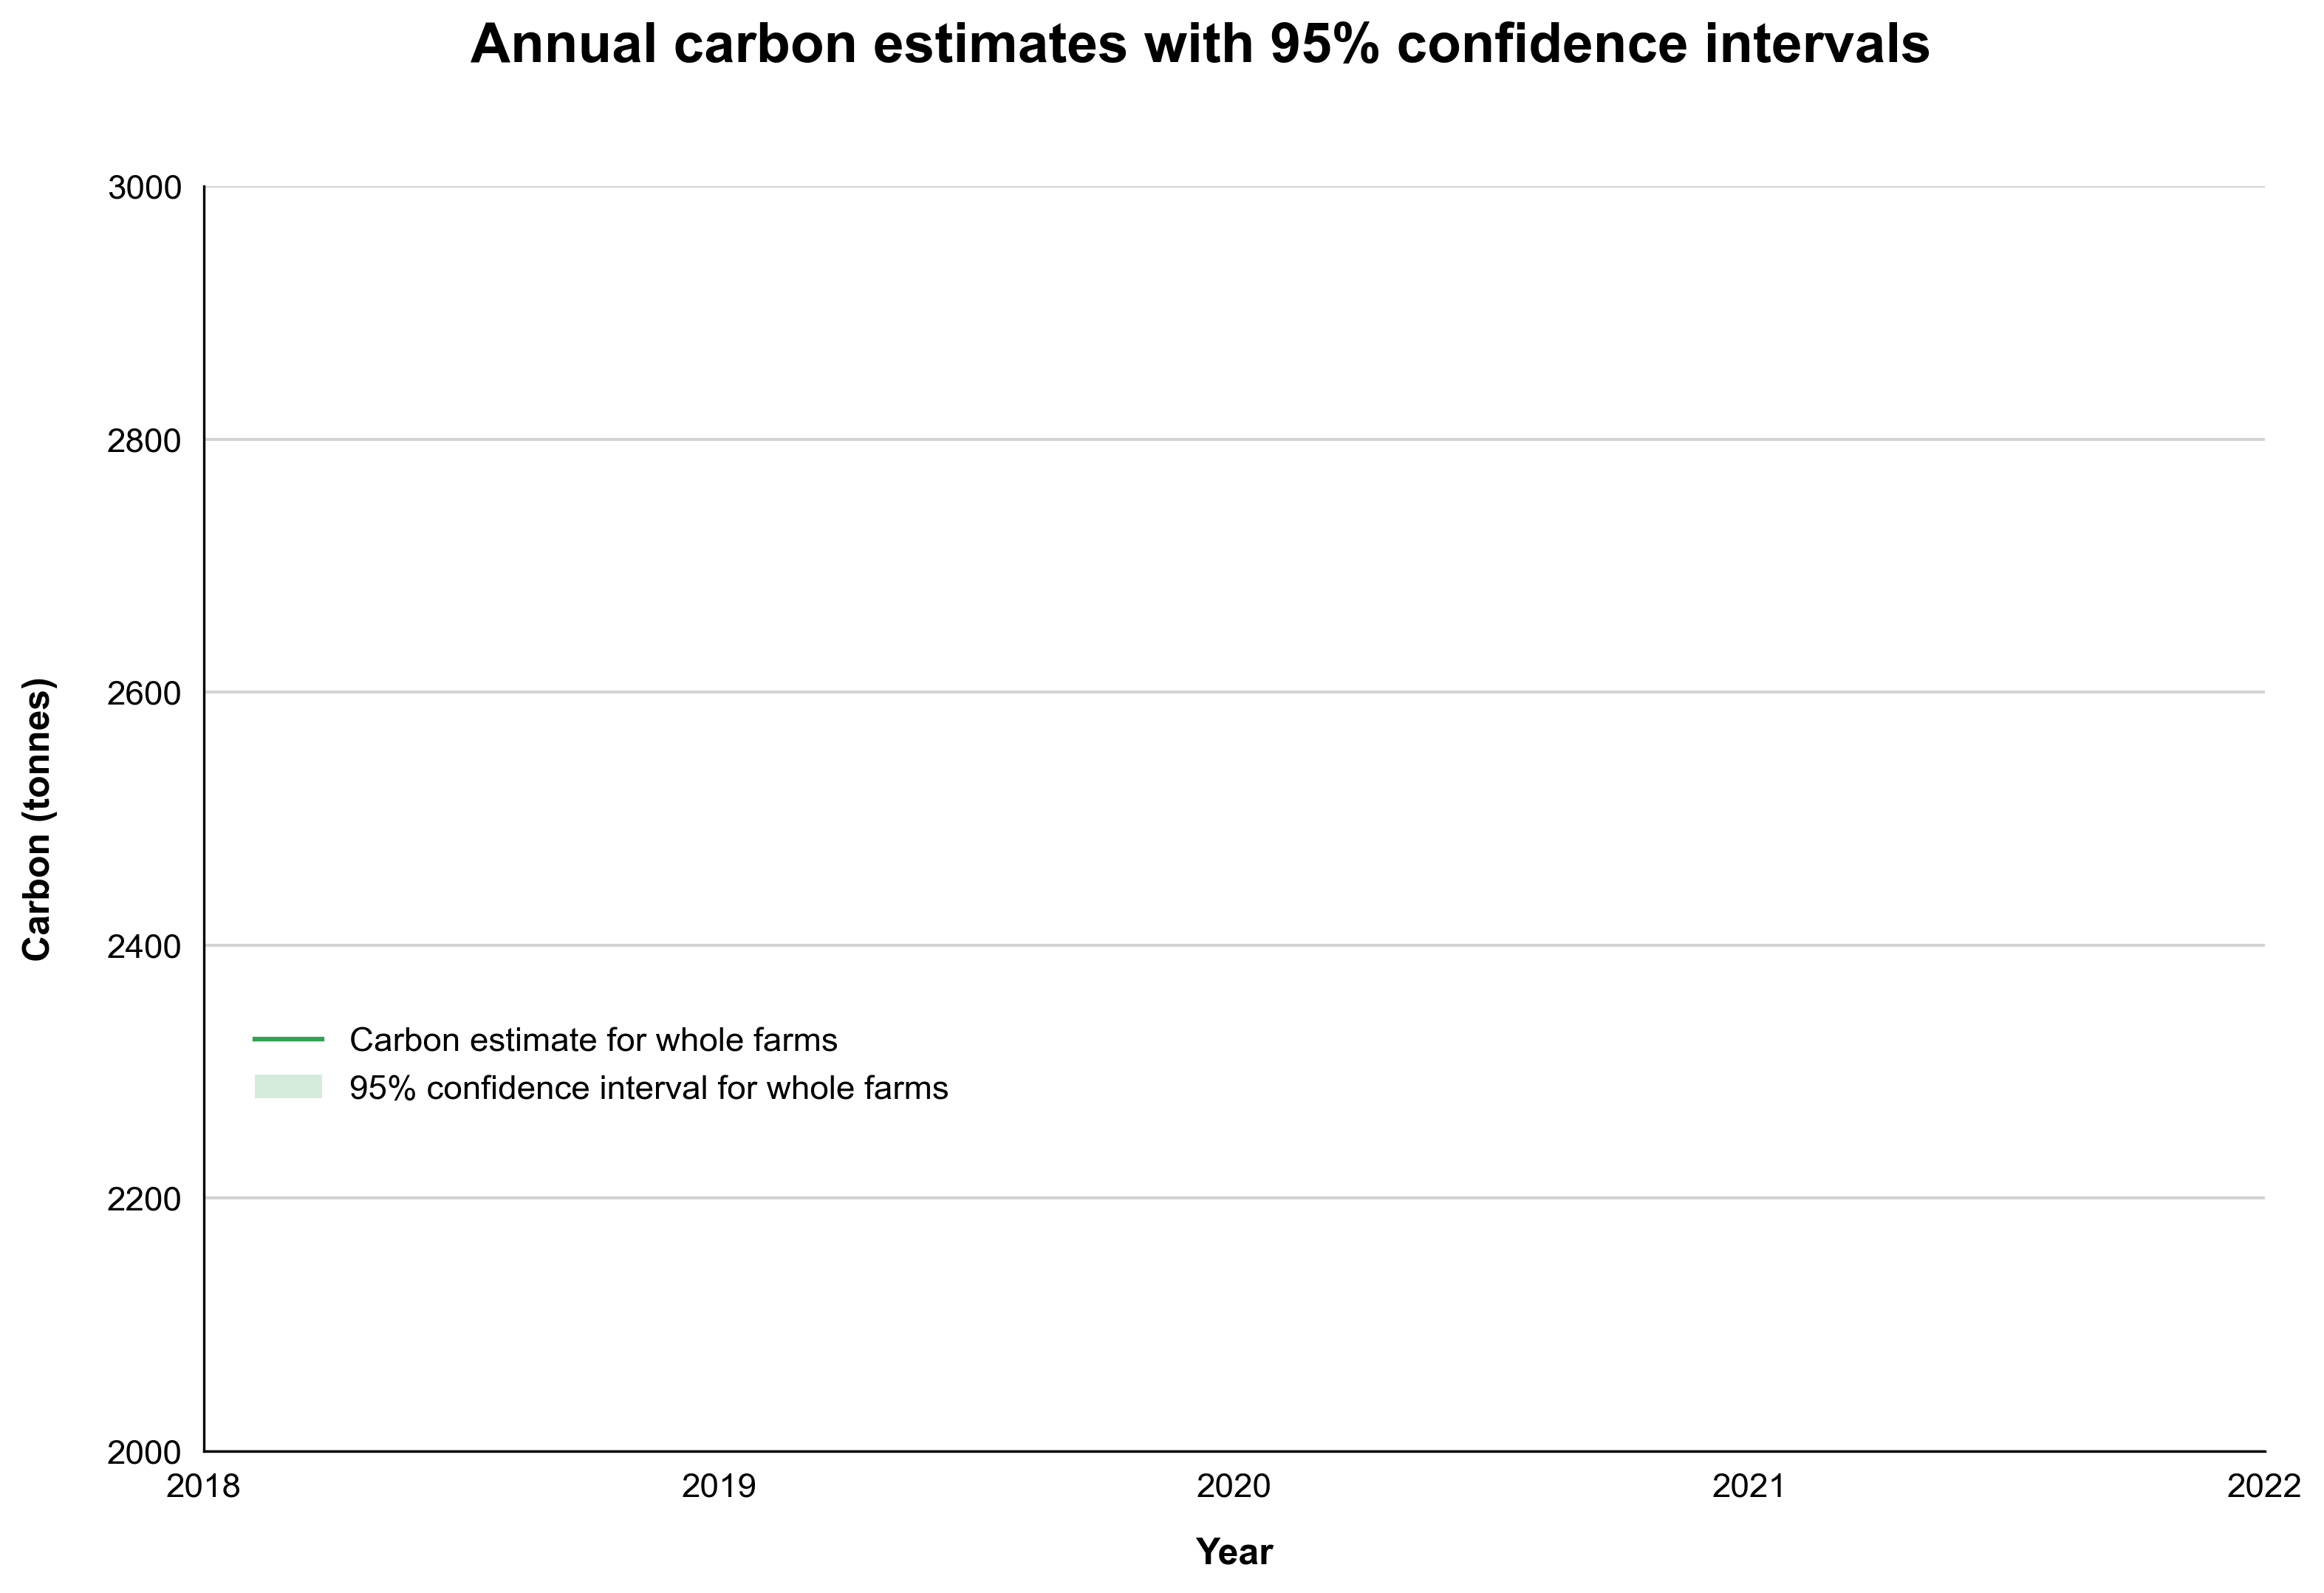

In [7]:
# colors
greens = ['#e5f5e0','#a1d99b','#31a354']  # light 2 dark
yellow2green256 = [list(eval(string[3:])) for string in ['rgb(247,252,185)','rgb(173,221,142)','rgb(49,163,84)']]
yellow2green = [[rgb/256 for rgb in rgb_lst] for rgb_lst in yellow2green256]

# plot
fig, ax = plt.subplots(1, figsize=(12,12*.618), dpi=300)
## total farm carbon estimates
ax.plot(data_farms.year, data_farms.carbonSum, color=greens[2], label='Carbon estimate for whole farms')

## 95% confidence intervals
ax.fill_between(data_farms.year, data_farms.carbonSum_lowCI, data_farms.carbonSum_highCI, 
                alpha=0.2, color=greens[2], edgecolor=None, 
                label='95% confidence interval for whole farms'
               )


# aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', color='lightgrey')
ax.set_axisbelow(True)
ax.set_xticks(range(studyStartYear-1,studyEndYear+1,1)) 
plt.setp(ax.get_xticklabels(), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)
ax.set_xlim(studyStartYear,studyEndYear)

ax.set_ylim(2000,3000) #!!! change max

# labels
ax.set_xlabel('Year', labelpad=11, fontsize=12, fontweight='bold')
ax.set_ylabel('Carbon (tonnes)', labelpad=16, fontsize=12, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.375), framealpha=1, #change position of legend
          fontsize=11, facecolor='white', edgecolor='white', borderpad=1)
plt.suptitle('Annual carbon estimates with 95% confidence intervals', fontsize=18, fontweight='bold')
# plt.title(forest_type_full+'; Initial stand age = '+str(stand_age)+' years')
# save figure
plt.savefig(file_path_lineChart,
          bbox_inches='tight', facecolor='white',format=image_format,dpi=300) 

## Generate Results for Table and Text

All results in units of both tonnes of C (tC) and tonnes of carbon equivalent (tCO2-eq) 
- amounts for start and end years of baseline and (for future reports), current year; for each land use
- difference between baseline start and end year for each land use (net change)
- percent change between baseline start and end year
- average amount of carbon captured in each land use (carbon reductions/year)


First generate a data frame of yearly carbon estimate per land use and a data frame of yearly carbon estimate minus lower confidence interval value, per land use.

In [9]:
# store and name the land use subsets in a dictionary
#data_dict = {'farms':data_farms,'interventions':data_intervention,'counterfactual':data_counterfactual,'reference':data_reference,'undesignated':data_undesignated}
data_dict = {'farms':data_farms,'interventions':data_intervention,'reference':data_reference,'undesignated':data_undesignated}

# generate two empty data frames
data = pd.DataFrame()
data_err = pd.DataFrame()
count=-1

# loop through the land use subset dictionary
for k, df in data_dict.items():
    count +=1
    data_LU = df
    data_LU.columns = [f'carbon_{k}', f'carbon_lowCI_{k}', f'carbon_highCI_{k}','year'] # rename columns
    data_LU = data_LU.set_index('year') # set year as index
    
    dat_s = data_LU[f'carbon_{k}'] # select carbon estimate
    err_s = dat_s - data_LU[f'carbon_lowCI_{k}'] #c estimate minus lower error
    
    data = pd.concat([data, dat_s], axis=1) 
    data_err = pd.concat([data_err, err_s], axis=1)
    data_err = data_err.rename(columns={data_err.columns[count]: f'err_{k}'}) 

In [10]:
data_err

,err_farms,err_interventions,err_reference,err_undesignated
2018,110.993299,10.772509,53.555325,98.708367
2019,111.677266,10.832767,53.335503,99.548731
2020,106.443900,11.171205,53.028885,93.647426
2021,107.899001,10.959222,53.299416,95.219523
2022,107.675488,11.093901,53.184925,94.978677


Baseline start and end year carbon values for each land uses, in units of tC.

In [11]:
data.loc[[studyStartYear,2019,2020,2021,studyEndYear]].apply(lambda x: round(x, 2))

,carbon_farms,carbon_interventions,carbon_reference,carbon_undesignated
2018,12941.04,833.34,5534.99,6917.58
2019,13081.66,922.47,5528.72,6973.53
2020,12763.66,1018.09,5547.41,6531.35
2021,12982.02,1075.39,5582.19,6665.09
2022,13083.94,1139.80,5590.34,6693.83


And now multiply by 3.67 to get the results in units of tCO2-eq. The atomic weight of carbon is 12 atomic mass units, while the weight of carbon dioxide is 44, because it includes two oxygen atoms that each weigh 16. So, one ton of carbon equals 44/12 = 11/3 = 3.67 tons of carbon dioxide.

In [12]:
data.loc[[studyStartYear,2019,2020,2021,studyEndYear]].multiply(3.67).apply(lambda x: round(x, 2))

,carbon_farms,carbon_interventions,carbon_reference,carbon_undesignated
2018,47493.63,3058.35,20313.43,25387.50
2019,48009.69,3385.47,20290.42,25592.84
2020,46842.62,3736.39,20359.01,23970.07
2021,47644.02,3946.67,20486.64,24460.89
2022,48018.06,4183.05,20516.55,24566.36


Next, calculate the difference between the study start and baseline end year in units of tC and tCO2-eq. 

In [13]:
data.loc[[studyStartYear, studyEndYear]].apply(lambda x: round(x, 2)).diff()

,carbon_farms,carbon_interventions,carbon_reference,carbon_undesignated
2018,NaN,NaN,NaN,NaN
2022,142.9,306.46,55.35,-223.75


In [14]:
data.loc[[studyStartYear, studyEndYear]].multiply(3.67).apply(lambda x: round(x, 2)).diff()

,carbon_farms,carbon_interventions,carbon_reference,carbon_undesignated
2018,NaN,NaN,NaN,NaN
2022,524.43,1124.7,203.12,-821.14


Calculate the percent change between the study start and end years.

In [15]:
data.loc[[studyStartYear,2019,2020,2021,studyEndYear]].apply(lambda x: round(x, 2)).pct_change().multiply(100)

,carbon_farms,carbon_interventions,carbon_reference,carbon_undesignated
2018,NaN,NaN,NaN,NaN
2019,1.086621,10.695514,-0.113279,0.808809
2020,-2.430884,10.365649,0.338053,-6.340835
2021,1.710795,5.628186,0.626959,2.047662
2022,0.785086,5.989455,0.146000,0.431202


Next, the average amount of carbon captured each year, for each land use. First, calcualte the difference between each pair of years.

In [16]:
data_diff = data.diff()
data_diff

,carbon_farms,carbon_interventions,carbon_reference,carbon_undesignated
2018,NaN,NaN,NaN,NaN
2019,140.615942,89.132557,-6.270393,55.950486
2020,-318.003831,95.620875,18.689332,-442.171514
2021,218.364835,57.296502,34.778466,133.737661
2022,101.919321,64.408018,8.148615,28.740207


Now calculate the average difference in units of tC and tCO2-eq.

In [17]:
## tC

#round(data_diff.dropna()['carbon_farms'].mean(), 2) #to view result for one land use

round(data_diff.dropna().mean(), 2)

carbon_farms            35.72
carbon_interventions    76.61
carbon_reference        13.84
carbon_undesignated    -55.94
dtype: float64

In [18]:
## tCO2-eq. 

round(data_diff.dropna().multiply(3.67).mean(), 2)

carbon_farms            131.11
carbon_interventions    281.18
carbon_reference         50.78
carbon_undesignated    -205.28
dtype: float64

## Generate bar chart of carbon estimates with 95% confidence intervals

Prepare dataframes for visualization.

In [19]:
data.pop('carbon_farms')
#data.pop('carbon_undesignated')
data = data.T
data

,2018,2019,2020,2021,2022
carbon_interventions,833.337547,922.470104,1018.090979,1075.387482,1139.795500
carbon_reference,5534.994259,5528.723866,5547.413198,5582.191665,5590.340280
carbon_undesignated,6917.575556,6973.526042,6531.354527,6665.092189,6693.832396


In [20]:
data_err.pop('err_farms')
#data_err.pop('err_undesignated')
data_err = data_err.T
data_err

,2018,2019,2020,2021,2022
err_interventions,10.772509,10.832767,11.171205,10.959222,11.093901
err_reference,53.555325,53.335503,53.028885,53.299416,53.184925
err_undesignated,98.708367,99.548731,93.647426,95.219523,94.978677


Filter by LU to divide the total carbon by the total area of each cover:

In [21]:
data1= data.loc[["carbon_interventions"]]/66.04218836916326
data2= data.loc[["carbon_reference"]]/86.05919022827149
data3= data.loc[["carbon_undesignated"]]/201.31040720214844

Creation of a new dataFrame to operate with Carbono stored (Tonnes/hectare) 

In [22]:
frames = [data1,data2,data3]
carbon_by_hectares = pd.concat(frames)
carbon_by_hectares

,2018,2019,2020,2021,2022
carbon_interventions,12.618261,13.967891,15.415767,16.283341,17.258597
carbon_reference,64.316132,64.243271,64.460439,64.864562,64.959248
carbon_undesignated,34.362732,34.640663,32.444197,33.108533,33.251298


Make list of land use names. Change depending on the deal.

In [24]:
site_names_CafeApui = ['Intervention', 'Counterfactual', 'Reference', 'Undesignated', 'All Farms']
site_names_Horta = ['Syntropic', 'Restoration', 'Counterfactual', 'Reference']
site_names_INOCAS = ['Intervention', 'Reference','Undesignated']
site_names_dic = {
    'farmM': site_names_INOCAS
}

In [25]:
fig_width = 7.2
fig_height = 4.45
grp_width = 0.66  # how filled with data each group is among its full width
bar_width_in_grp = grp_width * 0.9  # perc. data space filled w/ bars, w/in grp
fontsize_on_axis = 7
fontweight_barlabel = 'bold'
fontsize_off_axis = 8  # legend, axis label
lw_bar_edge = 1.5  # linewidth of bar edge
def normalize_rgb(rgb_lst):
    return [rgb/255 for rgb in rgb_lst]
#colors = [f'#{hx}' for hx in ['cbd328', 'f7d22c', '8ec33e', 'f98b2e', '3a583e']]
colors = [f'#{hx}' for hx in ['cbd328', '8ec33e', 'f98b2e',]]
#colors = [f'#{hx}' for hx in ['F5D226', '0088C6', 'CECFD0']]
grey_dark = normalize_rgb([116,114,114])
def show_spine(ax, visible_spine_lst):
    '''border line(s) to show on ax'''
    for position in ['top','bottom','left','right']:
        if position not in visible_spine_lst:
            ax.spines[position].set_visible(False)
def flip(items, ncol):
    '''rearrange elements of ITEMS so that when arranging the elements
    into NCOL columns by column, the result is the same as arranging
    the original ITEMS by row'''
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

In [26]:
def plot(legend_version, site_names):
    fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
    n_grp = timePeriods  # number of groups (time periods) 
    n_bar_per_grp = data.shape[0]  # number of land use/site types
    # calculate bar width and location of bar center
    n_gap_per_grp = n_bar_per_grp - 1
    gap_width = (grp_width - bar_width_in_grp) / n_gap_per_grp
    bar_width = bar_width_in_grp / n_bar_per_grp
    delta = gap_width + bar_width

    x_mid_coords = np.arange(n_grp)  # x axis label location, center of grp of bars
    n_bar_one_side = n_bar_per_grp / 2
    multipliers = np.arange(-n_bar_one_side, n_bar_one_side) + 0.5
    x_coord_deltas = [delta*mul for mul in multipliers]  # shift bar center for each bar in grp

    for i in range(n_bar_per_grp):
        x_coord_delta = x_coord_deltas[i]
        # graph bars
        color = colors[i]
        bars = ax.bar(x=x_mid_coords + x_coord_delta,
                      height=data.iloc[i, :],
                      width=bar_width,
                      color=color, edgecolor=color, linewidth=lw_bar_edge,
                      label=site_names[i])  # data.index[i][2:].title())
        if i == 0:  # site type = intervention
            bar_labels = data.iloc[i, :].map(lambda a: str(round(a, 1)))
            ax.bar_label(bars, labels=bar_labels, 
                         fontsize=fontsize_on_axis, fontweight=fontweight_barlabel, padding=2)
        ax.errorbar(x=x_mid_coords + x_coord_delta,
                    y=data.iloc[i, :], 
                    yerr= (data_err).iloc[i, :], 
                    fmt='none', ecolor='k', elinewidth=0.5)

    # label
    ax.set_xticks(x_mid_coords)
    ax.set_xticklabels(data.columns,
                       fontsize=fontsize_off_axis)
    ax.yaxis.set_tick_params(labelsize=fontsize_on_axis)
    ax.set_ylabel('Carbon (tonnes)', fontsize=fontsize_off_axis)
    # ax.set_title('Mangrove gain and loss, by decade and region, 2000-2020')
    # aesthetics
    show_spine(ax, [])
    ax.grid(axis='y')
    ax.axhline(color=grey_dark)
    ax.set_ylim(0) #!!! was originally -100
    fig.tight_layout()
    # legend
    handles, labels = ax.get_legend_handles_labels()
    ncol_legend = 5
    fig.legend(flip(handles, ncol_legend), flip(labels, ncol_legend),
               ncol=ncol_legend,
               loc='upper left', bbox_to_anchor=(ax.get_position().x0, 0),
               fontsize=fontsize_off_axis, frameon=False)
    # save and plot
    plt.savefig(file_path_barGraph,
               bbox_inches='tight', facecolor='white', format=image_format,dpi=300)
    plt.show()

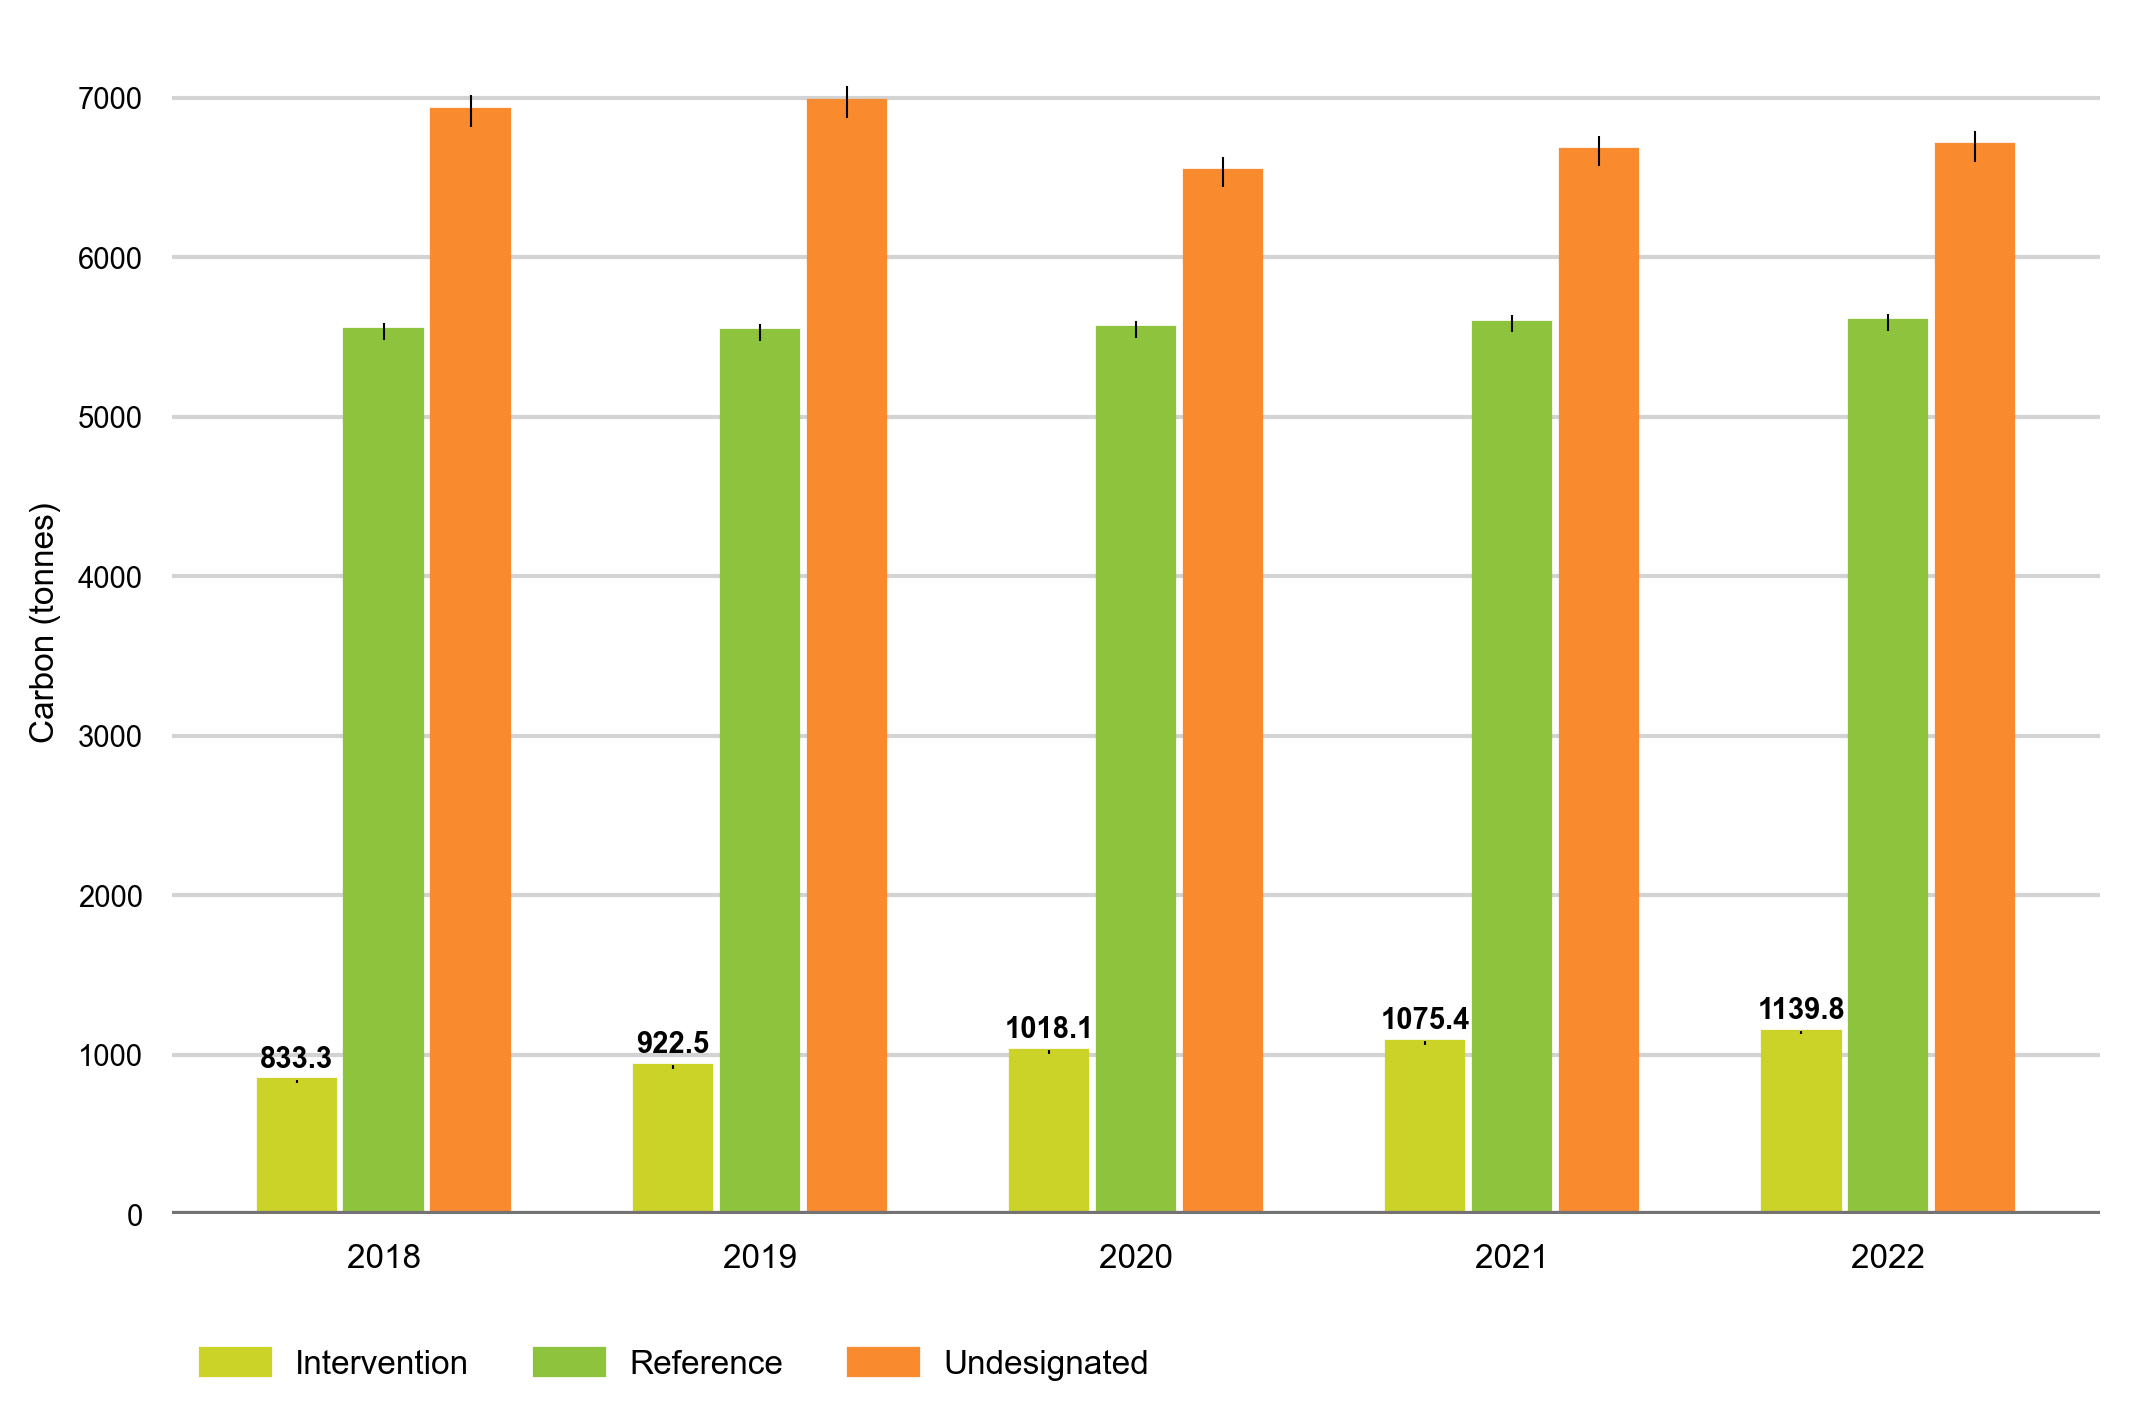

In [27]:
for (k,v) in site_names_dic.items():
    plot(legend_version=k, site_names=v)

In [28]:
# for Graph of Tonnes/hectares
def plot(legend_version, site_names):
    fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
    n_grp = timePeriods  # number of groups (time periods) 
    n_bar_per_grp = carbon_by_hectares.shape[0]  # number of land use/site types
    # calculate bar width and location of bar center
    n_gap_per_grp = n_bar_per_grp - 1
    gap_width = (grp_width - bar_width_in_grp) / n_gap_per_grp
    bar_width = bar_width_in_grp / n_bar_per_grp
    delta = gap_width + bar_width

    x_mid_coords = np.arange(n_grp)  # x axis label location, center of grp of bars
    n_bar_one_side = n_bar_per_grp / 2
    multipliers = np.arange(-n_bar_one_side, n_bar_one_side) + 0.5
    x_coord_deltas = [delta*mul for mul in multipliers]  # shift bar center for each bar in grp

    for i in range(n_bar_per_grp):
        x_coord_delta = x_coord_deltas[i]
        # graph bars
        color = colors[i]
        bars = ax.bar(x=x_mid_coords + x_coord_delta,
                      height=carbon_by_hectares.iloc[i, :],
                      width=bar_width,
                      color=color, edgecolor=color, linewidth=lw_bar_edge,
                      label=site_names[i])  # data.index[i][2:].title())
        if i == 0:  # site type = intervention
            bar_labels = carbon_by_hectares.iloc[i, :].map(lambda a: str(round(a, 1)))
            ax.bar_label(bars, labels=bar_labels, 
                         fontsize=fontsize_on_axis, fontweight=fontweight_barlabel, padding=2)
        ax.errorbar(x=x_mid_coords + x_coord_delta,
                    y=carbon_by_hectares.iloc[i, :], 
                    #yerr= (data_err).iloc[i, :], 
                    fmt='none', ecolor='k', elinewidth=0.5)

    # label
    ax.set_xticks(x_mid_coords)
    ax.set_xticklabels(carbon_by_hectares.columns,
                       fontsize=fontsize_off_axis)
    ax.yaxis.set_tick_params(labelsize=fontsize_on_axis)
    ax.set_ylabel('Carbon (tonnes/ha)', fontsize=fontsize_off_axis)
    # ax.set_title('Mangrove gain and loss, by decade and region, 2000-2020')
    # aesthetics
    show_spine(ax, [])
    ax.grid(axis='y')
    ax.axhline(color=grey_dark)
    ax.set_ylim(0) #!!! was originally -100
    fig.tight_layout()
    # legend
    handles, labels = ax.get_legend_handles_labels()
    ncol_legend = 5
    fig.legend(flip(handles, ncol_legend), flip(labels, ncol_legend),
               ncol=ncol_legend,
               loc='upper left', bbox_to_anchor=(ax.get_position().x0, 0),
               fontsize=fontsize_off_axis, frameon=False)
    # save and plot
    plt.savefig(file_path_barGraph2,
               bbox_inches='tight', facecolor='white', format=image_format,dpi=300)
    plt.show()

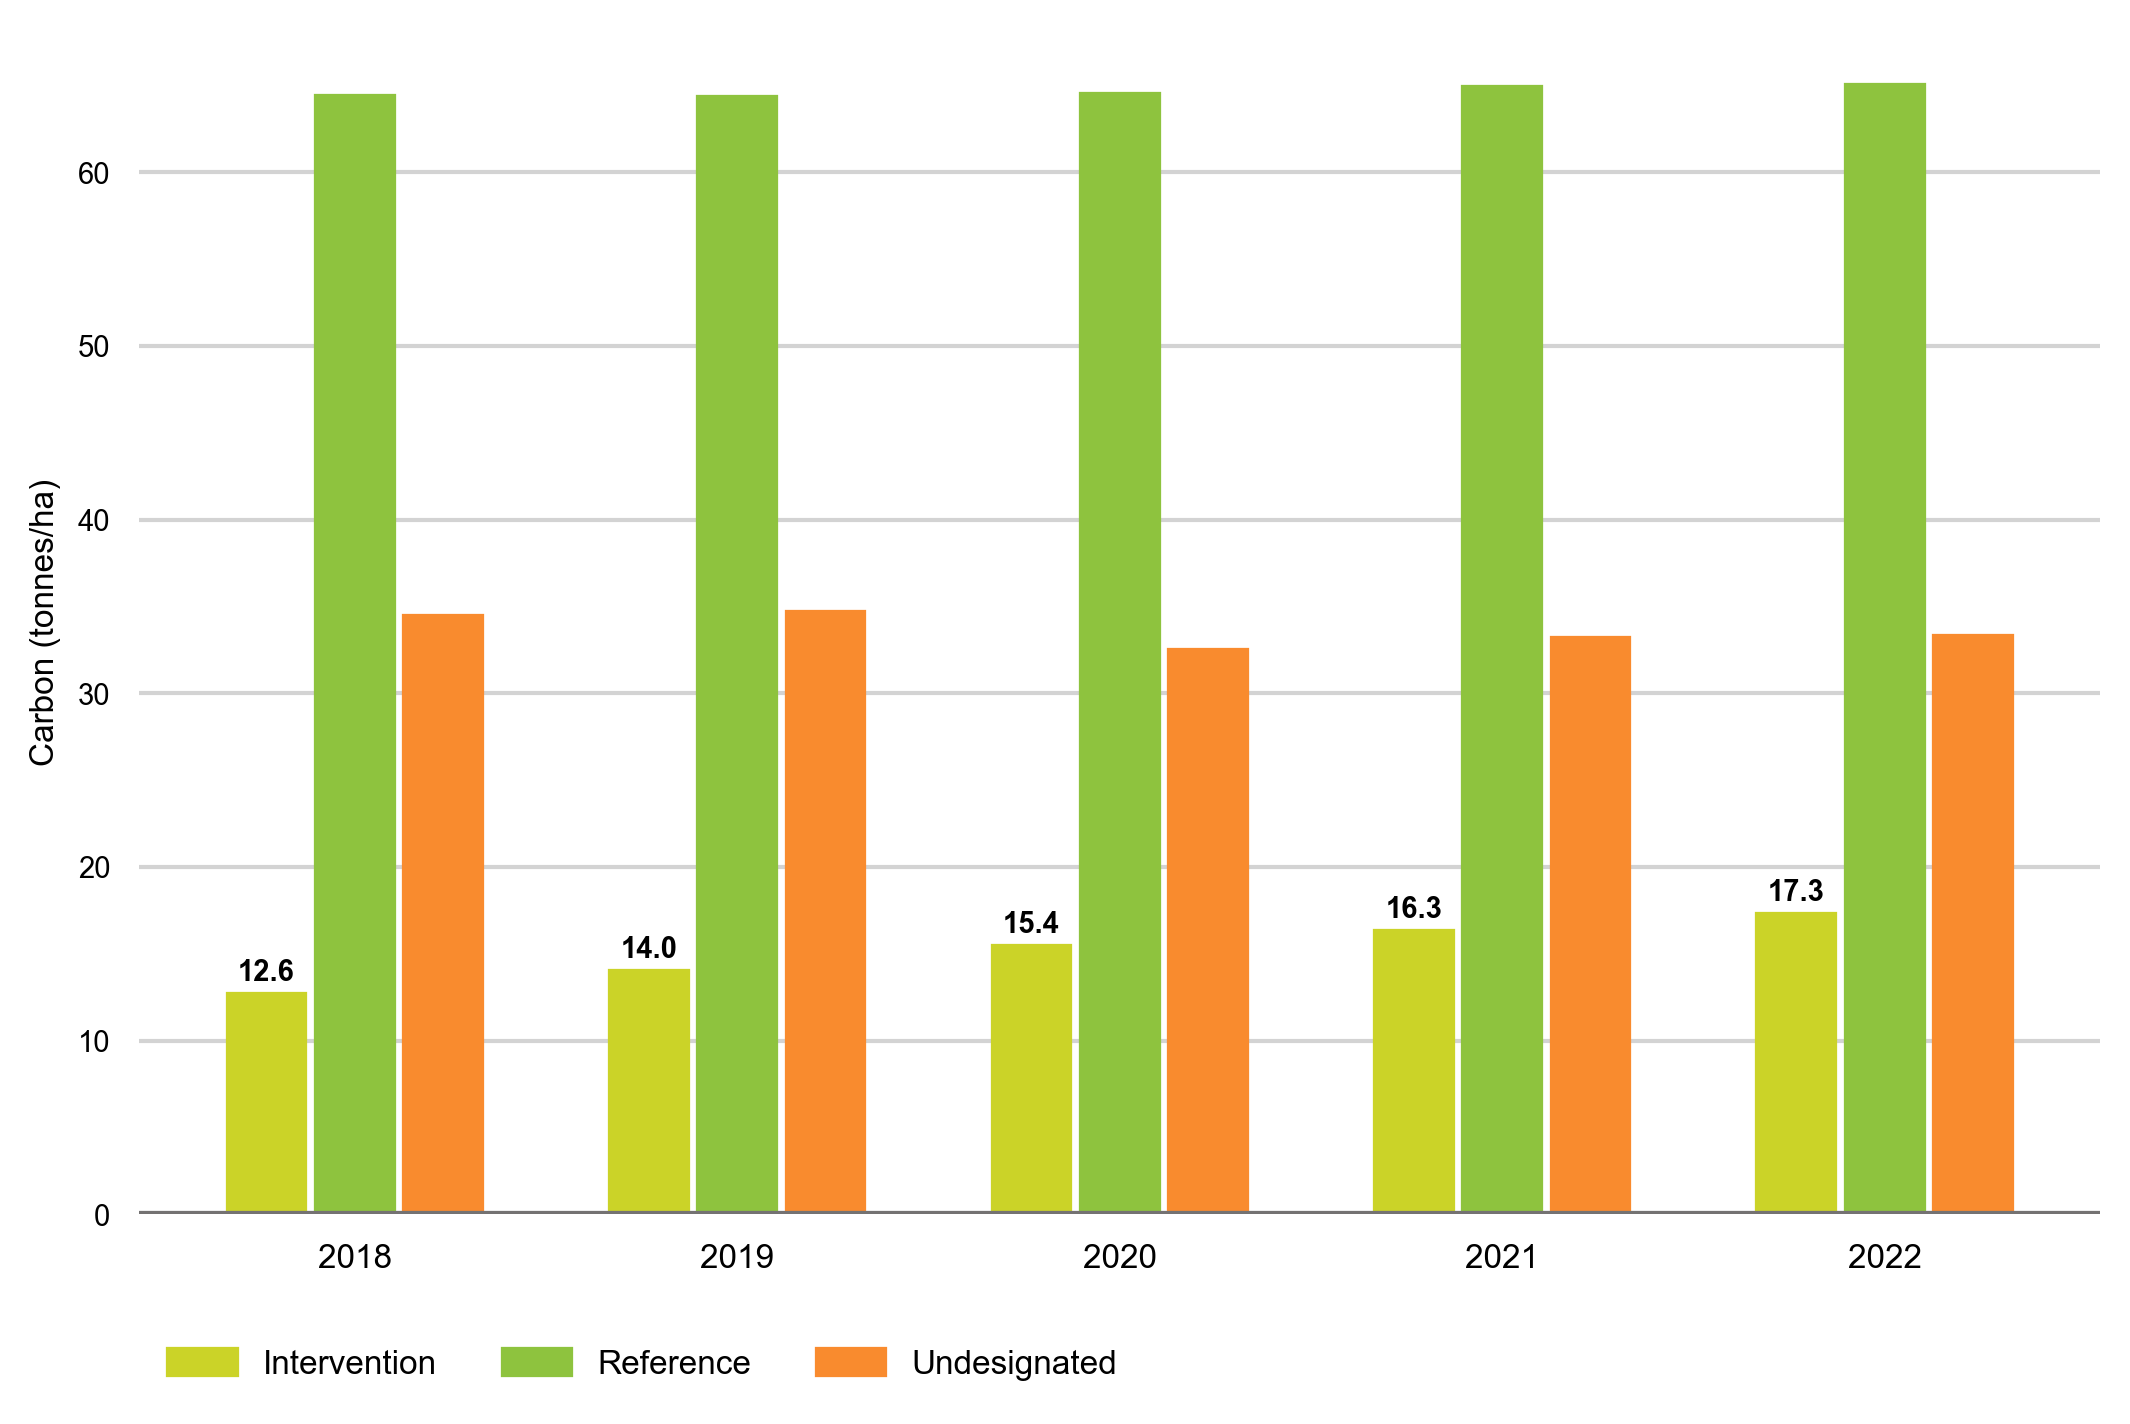

In [29]:
for (k,v) in site_names_dic.items():
    plot(legend_version=k, site_names=v)